# Assignment Module 2: Product Classification

The goal of this assignment is to implement a neural network that classifies smartphone pictures of products found in grocery stores. The assignment will be divided into two parts: first, you will be asked to implement from scratch your own neural network for image classification; then, you will fine-tune a pretrained network provided by PyTorch.


## Preliminaries: the dataset

The dataset you will be using contains natural images of products taken with a smartphone camera in different grocery stores:

<p align="center">
  <img src="https://github.com/marcusklasson/GroceryStoreDataset/raw/master/sample_images/natural/Granny-Smith.jpg" width="150">
  <img src="https://github.com/marcusklasson/GroceryStoreDataset/raw/master/sample_images/natural/Pink-Lady.jpg" width="150">
  <img src="https://github.com/marcusklasson/GroceryStoreDataset/raw/master/sample_images/natural/Lemon.jpg" width="150">
  <img src="https://github.com/marcusklasson/GroceryStoreDataset/raw/master/sample_images/natural/Banana.jpg" width="150">
  <img src="https://github.com/marcusklasson/GroceryStoreDataset/raw/master/sample_images/natural/Vine-Tomato.jpg" width="150">
</p>
<p align="center">
  <img src="https://github.com/marcusklasson/GroceryStoreDataset/raw/master/sample_images/natural/Yellow-Onion.jpg" width="150">
  <img src="https://github.com/marcusklasson/GroceryStoreDataset/raw/master/sample_images/natural/Green-Bell-Pepper.jpg" width="150">
  <img src="https://github.com/marcusklasson/GroceryStoreDataset/raw/master/sample_images/natural/Arla-Standard-Milk.jpg" width="150">
  <img src="https://github.com/marcusklasson/GroceryStoreDataset/raw/master/sample_images/natural/Oatly-Natural-Oatghurt.jpg" width="150">
  <img src="https://github.com/marcusklasson/GroceryStoreDataset/raw/master/sample_images/natural/Alpro-Fresh-Soy-Milk.jpg" width="150">
</p>

The products belong to the following 43 classes:
```
0.  Apple
1.  Avocado
2.  Banana
3.  Kiwi
4.  Lemon
5.  Lime
6.  Mango
7.  Melon
8.  Nectarine
9.  Orange
10. Papaya
11. Passion-Fruit
12. Peach
13. Pear
14. Pineapple
15. Plum
16. Pomegranate
17. Red-Grapefruit
18. Satsumas
19. Juice
20. Milk
21. Oatghurt
22. Oat-Milk
23. Sour-Cream
24. Sour-Milk
25. Soyghurt
26. Soy-Milk
27. Yoghurt
28. Asparagus
29. Aubergine
30. Cabbage
31. Carrots
32. Cucumber
33. Garlic
34. Ginger
35. Leek
36. Mushroom
37. Onion
38. Pepper
39. Potato
40. Red-Beet
41. Tomato
42. Zucchini
```

The dataset is split into training (`train`), validation (`val`), and test (`test`) set.

The following code cells download the dataset and define a `torch.utils.data.Dataset` class to access it. This `Dataset` class will be the starting point of your assignment: use it in your own code and build everything else around it.

In [ ]:
!git clone https://github.com/marcusklasson/GroceryStoreDataset.git

Cloning into 'GroceryStoreDataset'...
remote: Enumerating objects: 6559, done.
remote: Counting objects: 100% (266/266), done.
remote: Compressing objects: 100% (231/231), done.
remote: Total 6559 (delta 45), reused 35 (delta 35), pack-reused 6293
Receiving objects: 100% (6559/6559), 116.26 MiB | 15.89 MiB/s, done.
Resolving deltas: 100% (275/275), done.
Updating files: 100% (5717/5717), done.


In [ ]:
from pathlib import Path
from PIL import Image
from torch import Tensor
from torch.utils.data import Dataset
from typing import List, Tuple

In [ ]:
class GroceryStoreDataset(Dataset):

    def __init__(self, split: str, transform=None) -> None:
        super().__init__()

        # creando un oggetto Path che rappresenta il percorso "GroceryStoreDataset/dataset".
        # Questo oggetto Path ha molti metodi utili per lavorare con i percorsi dei file e delle directory
        self.root = Path("GroceryStoreDataset/dataset")
        self.split = split
        self.paths, self.labels = self.read_file()

        self.transform = transform

    # restituirà un valore di tipo intero
    # Il metodo __len__ è un metodo speciale in Python utilizzato per restituire la lunghezza di un oggetto.
    # Quando viene implementato in una classe, permette di utilizzare la funzione len() su un'istanza di quella classe.
    def __len__(self) -> int: # Questo metodo restituisce la lunghezza del dataset, cioè il numero totale di campioni.
        return len(self.labels)

    # Questo metodo viene chiamato quando si accede a un elemento del dataset tramite l'operatore di indice [].
    # Prende un indice idx e restituisce la coppia (immagine, etichetta) corrispondente.
    def __getitem__(self, idx) -> Tuple[Tensor, int]:

        # self.root / self.paths[idx]: costruisce il percorso completo dell'immagine combinando il percorso radice (self.root)
        # con il percorso specifico dell'immagine (self.paths[idx]).
        img = Image.open(self.root / self.paths[idx])
        label = self.labels[idx]

        if self.transform:
            img = self.transform(img)

        return img, label

    # il metodo restituisce una tupla contenente due liste
    def read_file(self) -> Tuple[List[str], List[int]]:
        paths = []
        labels = []
        # self.root / f"{self.split}.txt": costruisce il percorso del file di testo combinando il percorso radice (self.root) con
        # il nome del file, che dipende dal valore di self.split (ad esempio, train.txt, test.txt).
        # with open(...) as f: apre il file in modalità lettura e lo associa alla variabile f. Il costrutto with garantisce che
        # il file venga chiuso automaticamente alla fine del blocco.
        with open(self.root / f"{self.split}.txt") as f:
            for line in f: # itera su ogni riga del file.
                # path, fine-grained class, coarse-grained class

                # rimuove il carattere di nuova linea (\n) dalla fine della riga e divide la riga in una lista di stringhe
                # utilizzando ", " come delimitatore.
                path, _, label = line.replace("\n", "").split(", ")
                paths.append(path), labels.append(int(label))

        return paths, labels

    def get_num_classes(self) -> int:
        # max(self.labels): trova il valore massimo nella lista delle etichette (self.labels).
        # Questo rappresenta l'etichetta più alta nel dataset. +1 per l'indicizzazione.
        return max(self.labels) + 1

## Part 1: design your own network

Your goal is to implement a convolutional neural network for image classification and train it on `GroceryStoreDataset`. You should consider yourselves satisfied once you obtain a classification accuracy on the **validation** split of **around 60%**. You are free to achieve that however you want, except for a few rules you must follow:

- You **cannot** simply instantiate an off-the-self PyTorch network. Instead, you must construct your network as a composition of existing PyTorch layers. In more concrete terms, you can use e.g. `torch.nn.Linear`, but you **cannot** use e.g. `torchvision.models.alexnet`.

- Justify every *design choice* you make. Design choices include network architecture, training hyperparameters, and, possibly, dataset preprocessing steps. You can either (i) start from the simplest convolutional network you can think of and add complexity one step at a time, while showing how each step gets you closer to the target ~60%, or (ii) start from a model that is already able to achieve the desired accuracy and show how, by removing some of its components, its performance drops (i.e. an *ablation study*). You can *show* your results/improvements however you want: training plots, console-printed values or tables, or whatever else your heart desires: the clearer, the better.

Don't be too concerned with your network performance: the ~60% is just to give you an idea of when to stop. Keep in mind that a thoroughly justified model with lower accuracy will be rewarded **more** points than a poorly experimentally validated model with higher accuracy.

In [ ]:
# Semplicemente ho i file test.txt, train.txt e val.txt
# con dentro tutti i percorsi con le etichette

In [ ]:
import random
import time

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sn

import torch
import torch.nn as nn
import torch.nn.functional as F

from tqdm.notebook import tqdm

from torch.optim import Adam
from torch.utils.data import random_split, DataLoader
from torchvision import transforms as T, datasets

In [ ]:
# For repeatability
def fix_random(seed: int) -> None:

    np.random.seed(seed)
    random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)

    torch.backends.cudnn.benchmark = False
    torch.backends.cudnn.deterministic = True

fix_random(42)

###GPU Support

In [ ]:
gpu_avail = torch.cuda.is_available()
print(f"Is the GPU available? {gpu_avail}")

Is the GPU available? False


In [ ]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print(f"Device: {device}")

Device: cpu


###DATA

###Prepare data

In [ ]:
train_dset = GroceryStoreDataset('train')
test_dset = GroceryStoreDataset('test')
print(f'The number of classes is = {train_dset.get_num_classes()}')

The number of classes is = 43


In [ ]:
a,b = train_dset[0] # è una Pil image, potrei trasformarla in un tensore con valori normalizzati e fare un flattening
print(type(a))

<class 'PIL.JpegImagePlugin.JpegImageFile'>


In [ ]:
# normalizzazione e trasformazione in Tensore + flattening delle immagini di test e train

# definisco la trasformazione che voglio applicare
tsfms = T.Compose([
    T.Resize((256, 256)), # aggiungo un resize per non avere dimensioni diverse | lo testo dopo
    T.ToTensor(),
    T.Lambda(lambda x: x.flatten())  # Appiattisce il tensore in un vettore 1D
])

# mi basta specificare la trasformazione nel costruttore della classe
train_dset = GroceryStoreDataset('train', transform=tsfms)
val_dset = GroceryStoreDataset('val', transform=tsfms) # validation dataset già lo abbiamo
test_dset = GroceryStoreDataset('test', transform=tsfms)

In [ ]:
print(test_dset[0][0].shape)
print(test_dset[30][0].shape) # perchè non tutte le immagini hanno le stesse dimensioni? Potrei fare il Resize

torch.Size([196608])
torch.Size([196608])


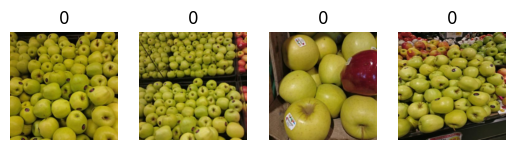

In [ ]:
_, ax = plt.subplots(1, 4)

for i, idx in enumerate([0, 10, 20, 30]):
    img, label = test_dset[idx]
    ax[i].imshow(img.reshape(3, 256, 256).permute(1, 2, 0))
    ax[i].set_title(label)
    ax[i].axis("off")

In [ ]:
# vediamo la grandezza del train e test set
print(f'Train dataset has {len(train_dset)} elements')
print(f'Validation dataset has {len(val_dset)} elements')
print(f'Test dataset has {len(test_dset)} elements')

Train dataset has 2640 elements
Validation dataset has 296 elements
Test dataset has 2485 elements


In [ ]:
batch_size = 256

train_dl = DataLoader(
    train_dset,
    batch_size=batch_size,
    shuffle=True
)
val_dl = DataLoader(
    val_dset,
    batch_size=batch_size
)
test_dl = DataLoader(
    test_dset,
    batch_size=batch_size
)

#Create the Network

### Start with a simple Linear NN

In [ ]:
class SimpleClassifier(nn.Module):
    def __init__(self, input_dim, hidden_dim, n_classes, n_hidden_layers=0):
        super().__init__()

        # Initialize the modules we need to build the network
        self.first = nn.Linear(input_dim, hidden_dim)
        self.activation = nn.ReLU()
        self.last = nn.Linear(hidden_dim, n_classes)

        self.hidden_layers = nn.ModuleList([
            nn.Linear(hidden_dim, hidden_dim) for i in range(n_hidden_layers)
        ])

    def forward(self, x):
        # Perform the calculation of the model to determine the prediction
        x = self.first(x)
        x = self.activation(x)
        for layer in self.hidden_layers:
            x = layer(x)
            x = self.activation(x)
        x = self.last(x)

        return x

In [ ]:
hidden_dim = 128
n_classes = train_dset.get_num_classes()
input_dim = len(train_dset[0][0])

model = SimpleClassifier(
    input_dim,
    hidden_dim,
    n_classes,
    n_hidden_layers=1
)

for name, params in model.named_parameters():
    print(f"{name}: {params.shape}")

first.weight: torch.Size([128, 196608])
first.bias: torch.Size([128])
last.weight: torch.Size([43, 128])
last.bias: torch.Size([43])
hidden_layers.0.weight: torch.Size([128, 128])
hidden_layers.0.bias: torch.Size([128])


In [ ]:
model.to(device)

SimpleClassifier(
  (first): Linear(in_features=196608, out_features=128, bias=True)
  (activation): ReLU()
  (last): Linear(in_features=128, out_features=43, bias=True)
  (hidden_layers): ModuleList(
    (0): Linear(in_features=128, out_features=128, bias=True)
  )
)

### Optimization

In [ ]:
optimizer = Adam(model.parameters(), lr=0.001)

In [ ]:
def ncorrect(scores, y): # scores sono le prediction, y sono le labels
    y_hat = torch.argmax(scores, -1) # prendo l'indice massimo di ogni score per tutti i dati del batch
    return (y_hat == y).sum() # faccio la somma per avere il numero di prediction corrette per batch

def accuracy(scores, y): # questo è solo per il calcolo della percentuale, quindi accuracy
    correct = ncorrect(scores, y)
    return correct.true_divide(y.shape[0])

def train_loop(model, train_dl, epochs, opt, val_dl=None, verbose=False):
    best_val_acc = 0
    best_params = []
    best_epoch = -1

    for e in tqdm(range(epochs)):
        # tqdm è una libreria Python utilizzata per mostrare barre di progresso nei cicli. È particolarmente utile quando si eseguono
        # operazioni che richiedono molto tempo

        model.train() #  il modello viene impostato in modalità di addestramento
        # ha i seguenti effetti: Impostare il modello in modalità di addestramento è cruciale perché alcuni moduli si comportano
        #                        diversamente durante l'addestramento e la valutazione.
        #                        Inoltre attiva il dropout e la BatchNormalization se sono presenti

        # Train #############################################################
        train_loss = 0
        train_samples = 0
        train_acc = 0
        for train_data in train_dl: # Tramite il dataloader prendo un batch, (img, label)

            # Questo codice serve a trasferire i dati di addestramento(tensore) (immagini e etichette) sul dispositivo specificato
            # (tipicamente una GPU) per accelerare l'addestramento del modello.
            imgs = train_data[0].to(device)
            labels = train_data[1].to(device)

            # forward pass del modello di deep learning model su un batch di immagini imgs e memorizza i risultati in scores
            scores = model(imgs) # tensore di 43 output

            loss = F.cross_entropy(scores, labels) # RICORDO che è la media !! Per questo si fa poi * imgs.shape[0]

            train_loss += loss.item() * imgs.shape[0] # loss è un tensore, e loss.item() estrae il valore numerico dallo stesso.
            # Questo valore rappresenta la perdita media per il batch corrente.

            train_samples += imgs.shape[0] # perchè la prima dimensione tiene conto del numero di samples usati
            train_acc += ncorrect(scores, labels).item()

            opt.zero_grad()  # Questa linea resetta (azzera) tutti i gradienti dei tensori ottimizzati dal modello. In PyTorch, i gradienti degli ottimizzatori vengono accumulati (cioè sommati) per default.
            loss.backward()  # Questa linea calcola i gradienti della funzione di perdita rispetto a tutti i parametri del modello (cioè esegue la backpropagation).
            opt.step()       # esegue un passo dell'ottimizzatore, cioè aggiorna i pesi del modello usando i gradienti calcolati nella fase precedente.

        # percentuale accuracy e percentuale loss
        train_acc /= train_samples
        train_loss /= train_samples

        # Validation #################################################################################à
        model.eval() # imposta il modello in modalità di valutazione.
        # Il modello viene utilizzato per fare previsioni sui dati di test o di validazione.
        # Le tecniche come il dropout vengono disattivate in questa fase perché non vogliamo introdurre casualità nelle previsioni.

        with torch.no_grad():
        # with torch.no_grad():: Questo contesto temporaneamente disabilita il calcolo dei gradienti.
        # È utile durante la valutazione del modello per evitare di accumulare gradienti e risparmiare memoria.

            val_loss = 0
            val_samples = 0
            val_acc = 0
            if val_dl is not None: # quindi solo se è predente un dataset per la validazione
                for val_data in val_dl: # prendo i batch di validation

                    # li metto sulla GPU
                    imgs = val_data[0].to(device)
                    labels = val_data[1].to(device)

                    # forward pass
                    val_scores = model(imgs)

                    val_loss += F.cross_entropy(val_scores, labels).item() * imgs.shape[0]
                    val_samples += imgs.shape[0]
                    val_acc += ncorrect(val_scores, labels).item()
                val_acc /= val_samples
                val_loss /= val_samples

            if val_dl is None or val_acc > best_val_acc:
                best_val_acc = val_acc if val_dl is not None else 0

                # Questo metodo restituisce un dizionario contenente i parametri (pesi e bias) di tutti gli strati del modello.
                # Le chiavi del dizionario sono i nomi dei parametri e i valori sono i tensori dei parametri stessi.
                best_params = model.state_dict()

                torch.save(best_params, "best_model.pth") # vengono salvati in un file chiamato "best_model.pth. Probabilmente vengono salvati nella root directory
                best_epoch = e

        # verbose: Questo è un parametro che controlla se le informazioni dettagliate dovrebbero essere stampate o meno.
        # Se è True, allora le informazioni vengono stampate.
        # e % 5 == 0: Questa condizione controlla se l'epoca corrente (e) è un multiplo di 5. In altre parole, stampa le informazioni solo ogni 5 epoche.
        if verbose and e % 5 == 0:
            print(f"Epoch {e}: train loss {train_loss:.3f} - train acc {train_acc:.3f}" + ("" if val_dl is None else f" - valid loss {val_loss:.3f} - valid acc {val_acc:.3f}"))

    if verbose and val_dl is not None:
        print(f"Best epoch {best_epoch}, best acc {best_val_acc}")

    return best_val_acc, best_params, best_epoch

### Training del primo modello semplice

In [ ]:
epochs = 20

best_val_acc, best_params, best_epoch = train_loop(
    model,
    train_dl,
    epochs,
    optimizer,
    val_dl,
    verbose=True
)

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch 0: train loss 7.106 - train acc 0.091 - valid loss 4.683 - valid acc 0.155
Epoch 5: train loss 2.423 - train acc 0.342 - valid loss 3.094 - valid acc 0.155
Epoch 10: train loss 1.840 - train acc 0.463 - valid loss 3.290 - valid acc 0.142
Epoch 15: train loss 1.383 - train acc 0.600 - valid loss 3.322 - valid acc 0.152
Best epoch 18, best acc 0.22635135135135134


In [ ]:
# il file best_model.pth è memorizzato nel filesystem temporaneo associato alla tua sessione di Colab
# significa che dovrò sempre poi rerunnare il modello -> non mi piace
# adesso trovo un modo per salvarlo per sempre in modo tale da non dover più rerunnare tutto il training

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp best_model.pth /content/drive/MyDrive/assignment

In [ ]:
torch.argmax(model(test_dset[0][0]), -1).item()

0

In [ ]:
model(test_dset[0][0])

tensor([ 14.2072,   0.2778,  11.4610,   1.3677,  11.8763,  14.1087,   8.1137,
         13.0951,  -5.2523,   5.7286,   7.1000,   3.2130,  -0.4701,  11.5714,
          3.0429, -11.4619,  -2.0230,   6.0306,   6.4043,   2.4462, -11.7706,
         -9.7814, -19.5280, -20.9865, -18.0913, -14.8395, -12.7357,  -2.1361,
         -1.3474,  -5.9739,   7.3682,   2.2732,   1.3907, -10.9410,   3.3308,
         -2.3233,   5.8866,  -0.3207,  12.9805,   3.0001, -11.0337,  -6.4755,
          6.1976], grad_fn=<ViewBackward0>)

#### Uso di una confusion matrix per verificare il modello come si comporta nella prediction delle classi

In [ ]:
model.eval()
confusion_matrix = torch.zeros(n_classes, n_classes, dtype=torch.int)

with torch.no_grad():
    for test_data in test_dl:
        imgs, labels = test_data
        imgs = imgs.to(device)
        labels = labels.to(device)

        scores = model(imgs) # tensore risultate dalla prediction
        preds = torch.argmax(scores, -1) # prendo solo l'indice con il risultato maggiore per tutti i datapoint del batch

        # view(-1) di un tensore in PyTorch è utilizzato per rimodellare (reshape) il tensore in una vista 1D (unidimensionale) mantenendo lo stesso numero di elementi.
        for lbl, pred in zip(labels.view(-1), preds.view(-1)):
                confusion_matrix[lbl.int(), pred.int()] += 1 # aggiunge +1 per ogni prediction del batch

# estrae gli elementi diagonali della matrice di confusione. Gli elementi diagonali rappresentano il numero di predizioni corrette
# per ciascuna classe (ovvero, dove l'etichetta reale coincide con la predizione)
# .sum() somma questi elementi, ottenendo il totale delle predizioni corrette.
test_acc = (torch.diagonal(confusion_matrix).sum() / confusion_matrix.sum()).item() # confusion_matrix.sum() calcola la somma di tutti gli elementi nella matrice di confusione
print(test_acc) # non fa altro che un calcolo dell'accuracy sui dati di test

0.24909456074237823


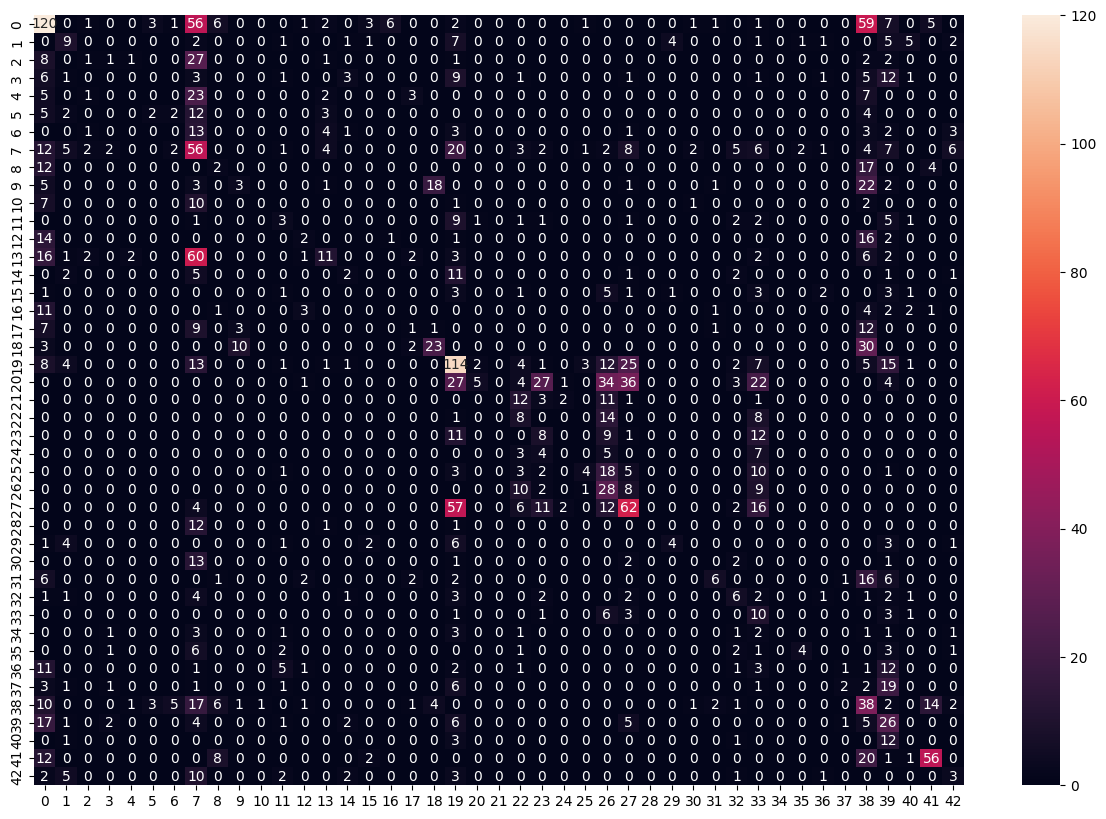

In [ ]:
plt.figure(figsize=(15, 10))
conf_mtrx_df = pd.DataFrame(confusion_matrix)
sn.heatmap(conf_mtrx_df, annot=True, fmt="d");
plt.show()

## Model 2 con aggiunta di più layers con batch normalization
Potrei anche rifare il primo modello con l'aggiunta di questa tecnica, poichè a livello teorico e sperimentale il primo modello fatto è senza senso, quindi si potrebbe partire da una base più solida

In [ ]:
def get_linear_bn_relu(input_dim, out_dim):
    modules = []
    modules.append(nn.Linear(input_dim, out_dim))
    modules.append(nn.BatchNorm1d(out_dim))
    modules.append(nn.ReLU())

    # costruisce un modulo sequenziale da una lista di moduli. *modules è la sintassi per passare la lista di moduli come argomenti
    # separati alla funzione nn.Sequential.
    # Il modulo sequenziale restituito applica ogni modulo nell'ordine in cui sono stati aggiunti alla lista quando viene chiamato
    # con un input.
    return nn.Sequential(*modules)

class SimpleClassifierBNv2(nn.Module):
    def __init__(self, input_dim, hidden_dim, n_classes, n_hidden_layers=0):
        super().__init__()

        self.first = get_linear_bn_relu(input_dim, hidden_dim)
        self.last = nn.Linear(hidden_dim, n_classes)

        self.hidden_layers = nn.ModuleList([
            get_linear_bn_relu(hidden_dim, hidden_dim) for i in range(n_hidden_layers)
        ])

    def forward(self, x):
        x = self.first(x)
        for layer in self.hidden_layers:
            x = layer(x)
        x = self.last(x)
        return x

In [ ]:
model2 = SimpleClassifierBNv2(
    input_dim,
    hidden_dim,
    n_classes,
    n_hidden_layers=3
)

model2.to(device)

optimizer = torch.optim.Adam(model2.parameters(), lr=0.01)
epochs = 25

best_val_acc, best_params, best_epoch = train_loop(
    model2,
    train_dl,
    epochs,
    optimizer,
    val_dl,
    verbose=True)

  0%|          | 0/25 [00:00<?, ?it/s]

Epoch 0: train loss 2.929 - train acc 0.233 - valid loss 5.739 - valid acc 0.017
Epoch 5: train loss 0.976 - train acc 0.677 - valid loss 3.596 - valid acc 0.182
Epoch 10: train loss 0.427 - train acc 0.862 - valid loss 4.468 - valid acc 0.179
Epoch 15: train loss 0.166 - train acc 0.948 - valid loss 5.647 - valid acc 0.186
Epoch 20: train loss 0.053 - train acc 0.989 - valid loss 6.369 - valid acc 0.159
Best epoch 3, best acc 0.22297297297297297


Non è cambiato nulla a livello di accuracy

In [ ]:
!cp best_model.pth /content/drive/MyDrive/assignment

In [ ]:
for name, params in model2.named_parameters():
    print(f"{name}: {params.shape}")

first.0.weight: torch.Size([128, 196608])
first.0.bias: torch.Size([128])
first.1.weight: torch.Size([128])
first.1.bias: torch.Size([128])
last.weight: torch.Size([43, 128])
last.bias: torch.Size([43])
hidden_layers.0.0.weight: torch.Size([128, 128])
hidden_layers.0.0.bias: torch.Size([128])
hidden_layers.0.1.weight: torch.Size([128])
hidden_layers.0.1.bias: torch.Size([128])
hidden_layers.1.0.weight: torch.Size([128, 128])
hidden_layers.1.0.bias: torch.Size([128])
hidden_layers.1.1.weight: torch.Size([128])
hidden_layers.1.1.bias: torch.Size([128])
hidden_layers.2.0.weight: torch.Size([128, 128])
hidden_layers.2.0.bias: torch.Size([128])
hidden_layers.2.1.weight: torch.Size([128])
hidden_layers.2.1.bias: torch.Size([128])


In [ ]:
# Il Batch Normalization (BatchNorm) aggiunge un tensore di pesi e uno di bias per consentire alla rete neurale di apprendere i
# parametri di scala e traslazione appropriati durante l'addestramento.
# Il Batch Normalization (BatchNorm) aggiunge un tensore di pesi e uno di bias per consentire alla rete neurale di apprendere i parametri
# di scala e traslazione appropriati durante l'addestramento.
# Questi parametri vengono appresi durante l'addestramento

Load the model 2

In [ ]:
state_dict = torch.load("/content/drive/MyDrive/assignment/modulo2/model_2.pth")

hidden_dim = 128
n_classes = train_dset.get_num_classes()
input_dim = len(train_dset[0][0])

model_2 = model = SimpleClassifierBNv2(
    input_dim,
    hidden_dim,
    n_classes,
    n_hidden_layers=3
)

model_2.load_state_dict(state_dict)

model_2.to(device)

SimpleClassifierBNv2(
  (first): Sequential(
    (0): Linear(in_features=196608, out_features=128, bias=True)
    (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (last): Linear(in_features=128, out_features=43, bias=True)
  (hidden_layers): ModuleList(
    (0-2): 3 x Sequential(
      (0): Linear(in_features=128, out_features=128, bias=True)
      (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
    )
  )
)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Testing model 2 and Confusion Matrix

In [ ]:
model_2.eval()
confusion_matrix = torch.zeros(n_classes, n_classes, dtype=torch.int)

with torch.no_grad():
    for test_data in test_dl:
        imgs, labels = test_data
        imgs = imgs.to(device)
        labels = labels.to(device)

        scores = model_2(imgs)
        preds = torch.argmax(scores, -1)

        for lbl, pred in zip(labels.view(-1), preds.view(-1)):
                confusion_matrix[lbl.int(), pred.int()] += 1

test_acc = (torch.diagonal(confusion_matrix).sum() / confusion_matrix.sum()).item()
print(test_acc)

0.2740442752838135


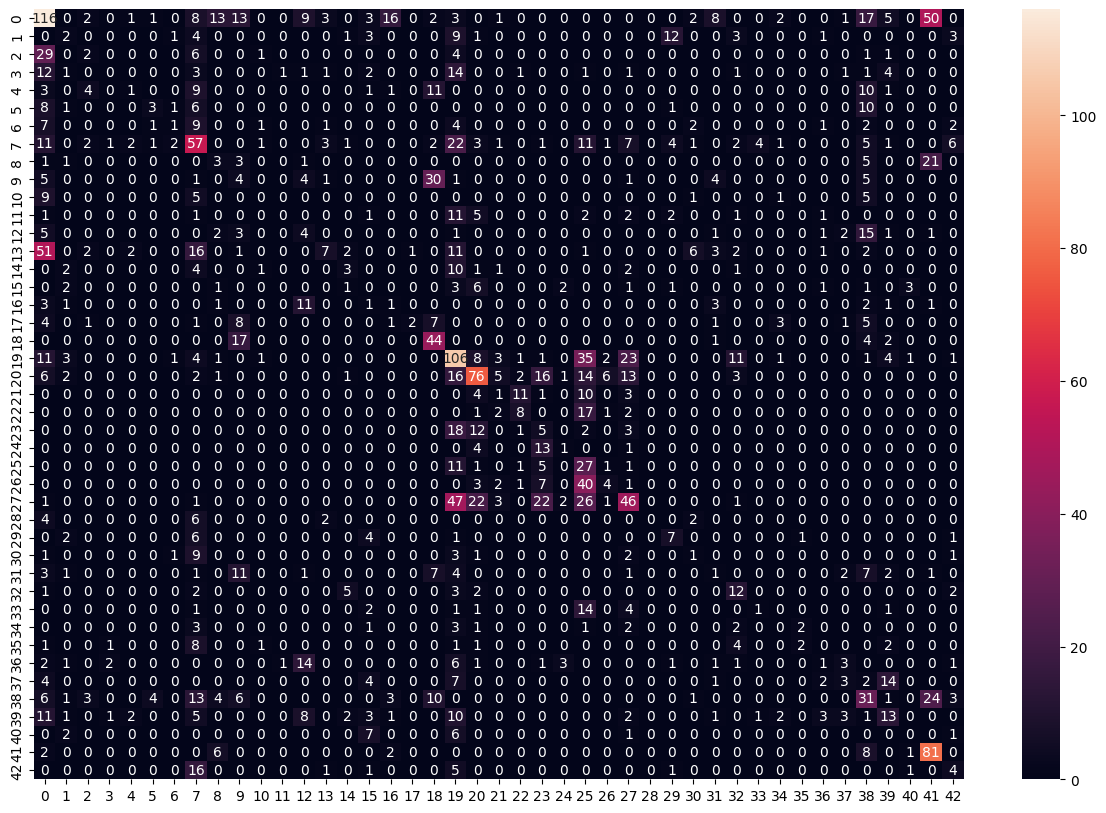

In [ ]:
plt.figure(figsize=(15, 10))
conf_mtrx_df = pd.DataFrame(confusion_matrix)
sn.heatmap(conf_mtrx_df, annot=True, fmt="d");
plt.show()

### CNN
Poichè i modelli attuali sono troppo semplici e non adatti a un problema di 'Image-Recognition'

In [ ]:
from torchsummary import summary

In [ ]:
cfg = {
    "batch_size": 4,
}

In [ ]:
data_transforms = {
    "train": T.Compose([T.Resize((256, 256)),
                        # T.RandomResizedCrop(cfg["crop_size"]),
                        T.RandomHorizontalFlip(),
                        T.ToTensor(),
                        # T.Normalize(mean_image_net, std_image_net) penso dovrò calcolarmeli
                        ]),

    "val": T.Compose([T.Resize((256, 256)),
                      # T.CenterCrop(cfg["crop_size"]),
                      # T.Normalize(mean_image_net, std_image_net)])
                      T.ToTensor()]),

    "test": T.Compose([T.Resize((256, 256)),
                       T.ToTensor()])
}

train_dset = GroceryStoreDataset('train', transform=data_transforms['train'])
val_dset = GroceryStoreDataset('val', transform=data_transforms['val'])
test_dset = GroceryStoreDataset('test', transform=data_transforms['test'])

In [ ]:
train_dl = DataLoader(
    train_dset,
    batch_size=cfg['batch_size'],
    shuffle=True,
    pin_memory=True
)
val_dl = DataLoader(
    val_dset,
    batch_size=cfg['batch_size'],
    shuffle=False
)
test_dl = DataLoader(
    test_dset,
    batch_size=cfg['batch_size']
)

In [ ]:
n_classes = train_dset.get_num_classes()
len(train_dset[0][0]) # channels number

3

In [ ]:
image, label = train_dset[0]
print(image.shape)

torch.Size([3, 256, 256])


In [ ]:
def get_conv_bn_relu(in_channels, out_channels, kernel_size=3, stride=1, padding=1):
    return nn.Sequential(
        nn.Conv2d(in_channels, out_channels, kernel_size=kernel_size, stride=stride, padding=padding),
        nn.BatchNorm2d(out_channels),
        nn.ReLU()
    )

class CNNClassifier(nn.Module):
    def __init__(self, num_classes):
        super(CNNClassifier, self).__init__()

        self.conv1 = get_conv_bn_relu(3, 32)
        self.conv2 = get_conv_bn_relu(32, 64)
        self.conv3 = get_conv_bn_relu(64, 128)
        self.conv4 = get_conv_bn_relu(128, 256)

        self.pool = nn.MaxPool2d(2, 2)
        self.avg_pool = nn.AdaptiveAvgPool2d((1, 1))

        self.fc = nn.Linear(256, num_classes)

    def forward(self, x):
        x = self.pool(self.conv1(x))
        x = self.pool(self.conv2(x))
        x = self.pool(self.conv3(x))
        x = self.conv4(x)
        x = self.avg_pool(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
CNN_model = CNNClassifier(n_classes).to(device)

summary(CNN_model, input_size=(3, 256, 256))


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 256, 256]             896
       BatchNorm2d-2         [-1, 32, 256, 256]              64
              ReLU-3         [-1, 32, 256, 256]               0
         MaxPool2d-4         [-1, 32, 128, 128]               0
            Conv2d-5         [-1, 64, 128, 128]          18,496
       BatchNorm2d-6         [-1, 64, 128, 128]             128
              ReLU-7         [-1, 64, 128, 128]               0
         MaxPool2d-8           [-1, 64, 64, 64]               0
            Conv2d-9          [-1, 128, 64, 64]          73,856
      BatchNorm2d-10          [-1, 128, 64, 64]             256
             ReLU-11          [-1, 128, 64, 64]               0
        MaxPool2d-12          [-1, 128, 32, 32]               0
           Conv2d-13          [-1, 256, 32, 32]         295,168
      BatchNorm2d-14          [-1, 256,

In [ ]:
CNN_model.to(device)

optimizer = torch.optim.Adam(CNN_model.parameters(), lr=0.01)
epochs = 20

best_val_acc, best_params, best_epoch = train_loop(
    CNN_model,
    train_dl,
    epochs,
    optimizer,
    val_dl,
    verbose=True)

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch 0: train loss 2.972 - train acc 0.199 - valid loss 2.889 - valid acc 0.223
Epoch 5: train loss 1.496 - train acc 0.530 - valid loss 2.894 - valid acc 0.321
Epoch 10: train loss 0.890 - train acc 0.712 - valid loss 2.167 - valid acc 0.503
Epoch 15: train loss 0.570 - train acc 0.820 - valid loss 2.677 - valid acc 0.497
Best epoch 14, best acc 0.5304054054054054


In [ ]:
!cp best_model.pth /content/drive/MyDrive/assignment

In [ ]:
CNN_model.eval()
confusion_matrix = torch.zeros(n_classes, n_classes, dtype=torch.int)

with torch.no_grad():
    for test_data in test_dl:
        imgs, labels = test_data
        imgs = imgs.to(device)
        labels = labels.to(device)

        scores = CNN_model(imgs)
        preds = torch.argmax(scores, -1)

        for lbl, pred in zip(labels.view(-1), preds.view(-1)):
                confusion_matrix[lbl.int(), pred.int()] += 1

test_acc = (torch.diagonal(confusion_matrix).sum() / confusion_matrix.sum()).item()
print(test_acc)

0.5975854992866516


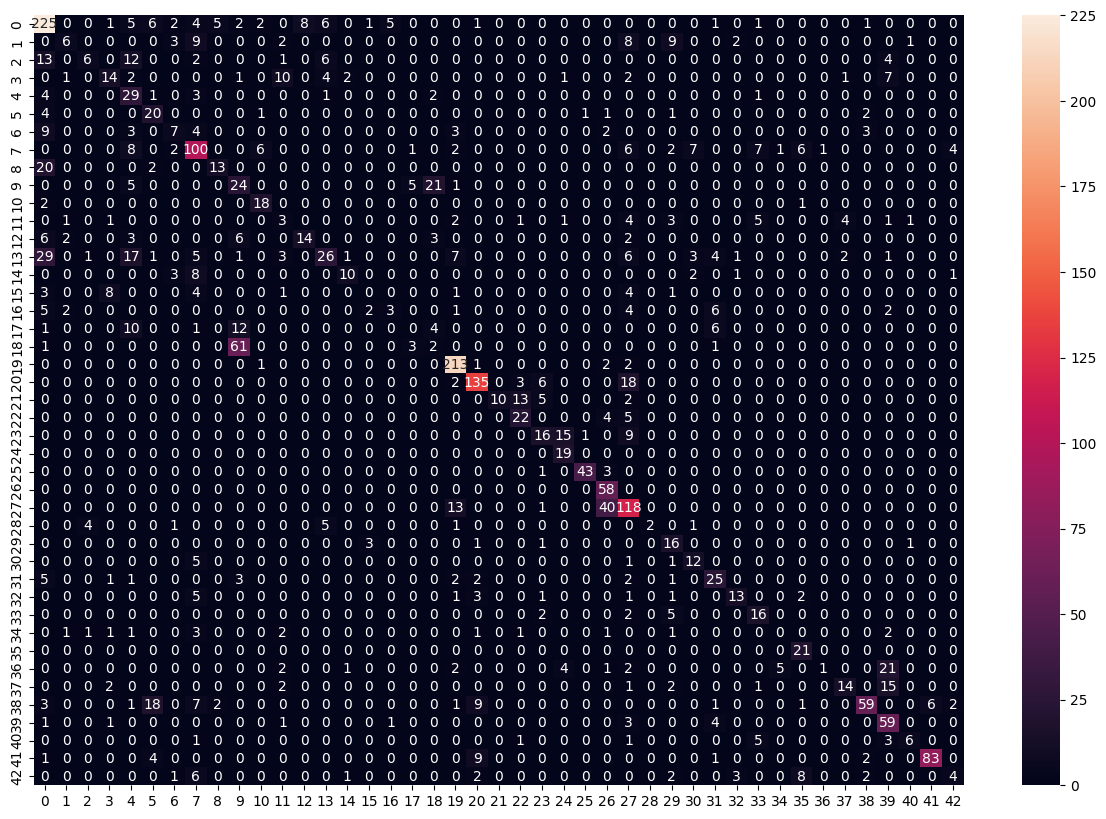

In [ ]:
plt.figure(figsize=(15, 10))
conf_mtrx_df = pd.DataFrame(confusion_matrix)
sn.heatmap(conf_mtrx_df, annot=True, fmt="d");
plt.show()

Ho raggiunto una precisione dui dati di test di circa 60 per cento
Provo a migliorare il modello ulteriormente

# CNN_2
In questo caso provo a normalizzare i dati e a usare tecniche per la regolarizzazione per l'addestramento

In [ ]:
cfg = {
    "resize_size": 256,
    "crop_size": 224,

    "batch_size": 4,
    "num_epochs": 20,

    "lr": 1e-3,
    "wd": 1e-4,
    "step_size": 5
}

In [ ]:
train_dset = GroceryStoreDataset('train', transform=T.Compose([T.Resize((256, 256)), T.ToTensor()]))
images = []
for image, _ in train_dset:
    images.append(np.array(image))

# Calcola le medie e le deviazioni standard delle immagini
mean_training_data = np.mean(images, axis=(0, 2, 3))
std_training_data = np.std(images, axis=(0, 2, 3))


In [ ]:
print(mean_training_data)
print(std_training_data)

[0.53058594 0.3963665  0.2563837 ]
[0.24343865 0.22089787 0.20542131]


In [ ]:
data_transforms = {
    "train": T.Compose([T.RandomResizedCrop(cfg["crop_size"]),
                        T.RandomHorizontalFlip(),
                        T.ToTensor(),
                        T.Normalize(mean_training_data, std_training_data)]),

    "val": T.Compose([T.CenterCrop(cfg["crop_size"]),
                      T.ToTensor(),
                      T.Normalize(mean_training_data, std_training_data)]),

    "test": T.Compose([T.Resize((cfg["crop_size"], cfg["crop_size"])),
                       T.ToTensor()])
}

train_dset = GroceryStoreDataset('train', transform=data_transforms['train'])
val_dset = GroceryStoreDataset('val', transform=data_transforms['val'])
test_dset = GroceryStoreDataset('test', transform=data_transforms['test'])

In [ ]:
train_dl = DataLoader(
    train_dset,
    batch_size=cfg['batch_size'],
    shuffle=True,
    pin_memory=True
)
val_dl = DataLoader(
    val_dset,
    batch_size=cfg['batch_size'],
    shuffle=False
)
test_dl = DataLoader(
    test_dset,
    batch_size=cfg['batch_size']
)

In [ ]:
n_classes = train_dset.get_num_classes()
image, label = train_dset[0]
print(image.shape)

torch.Size([3, 224, 224])


In [ ]:
!pip install -q torchmetrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 868.8/868.8 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 41.0 MB/s eta 0:00:00


In [ ]:
from torch.optim import AdamW
from torch.optim.lr_scheduler import OneCycleLR
from torchmetrics.classification.accuracy import Accuracy
import copy

In [ ]:
import copy

class Trainer:
    def __init__(self,
            model: nn.Module,
            train_loader: DataLoader,
            val_loader: DataLoader,
            device: torch.device,
            num_classes: int
        ) -> None:
        self.train_loader = train_loader
        self.val_loader = val_loader
        self.device = device
        self.num_classes = num_classes
        self.num_epochs = cfg["num_epochs"]

        self.model = model.to(device)
        self.optimizer = AdamW(self.model.parameters(), lr=cfg["lr"], weight_decay=cfg["wd"])
        num_steps = self.num_epochs * len(train_loader)
        self.scheduler = OneCycleLR(self.optimizer, cfg["lr"], total_steps=num_steps)

        self.step = 0
        self.best_acc = 0.0
        self.best_model_path = "best_model.pth"

    def train(self, verbose=False):
        best_val_acc = 0
        best_params = []
        best_epoch = -1
        for e in tqdm(range(self.num_epochs), desc="Epoch"):
            self.model.train() # modalità train

            for imgs, labels in self.train_loader:
                imgs = imgs.to(self.device)
                labels = labels.to(self.device)

                pred = self.model(imgs)
                loss = F.cross_entropy(pred, labels)

                self.optimizer.zero_grad()
                loss.backward()
                self.optimizer.step()
                self.scheduler.step() # Aggiorna lo scheduler del learning rate.

                self.step += 1

            train_loss, train_acc = self.evaluate(self.train_loader)
            val_loss, val_acc = self.evaluate(self.val_loader)

            if verbose:
                print(f"Epoch {e}: train loss {train_loss:.3f} - train acc {train_acc:.3f}" + ("" if self.val_loader is None else f" - valid loss {val_loss:.3f} - valid acc {val_acc:.3f}"))

            if val_acc > best_val_acc:
                best_val_acc = val_acc
                best_params = copy.deepcopy(self.model.state_dict())
                best_epoch = e
                torch.save(best_params, self.best_model_path)

        return best_val_acc, best_params, best_epoch

    @torch.no_grad()
    def evaluate(self, data_loader: DataLoader) -> Tuple[float, float]:
        self.model.eval()

        acc = Accuracy("multiclass", num_classes=self.num_classes).to(self.device)

        losses = []
        for imgs, labels in data_loader:
            imgs = imgs.to(self.device)
            labels = labels.to(self.device)

            pred = self.model(imgs)
            loss = F.cross_entropy(pred, labels)
            losses.append(loss.item())

            pred_softmax = F.softmax(pred, dim=-1)
            acc(pred_softmax, labels)

        loss = sum(losses) / len(losses)
        accuracy = acc.compute()

        return loss, accuracy


In [ ]:
def get_conv_bn_relu(in_channels, out_channels, kernel_size=3, stride=1, padding=1):
    return nn.Sequential(
        nn.Conv2d(in_channels, out_channels, kernel_size=kernel_size, stride=stride, padding=padding),
        nn.BatchNorm2d(out_channels),
        nn.ReLU()
    )

In [ ]:
class CNNClassifier(nn.Module):
    def __init__(self, num_classes):
        super(CNNClassifier, self).__init__()

        self.conv1 = get_conv_bn_relu(3, 32)
        self.conv2 = get_conv_bn_relu(32, 64)
        self.conv3 = get_conv_bn_relu(64, 128)
        self.conv4 = get_conv_bn_relu(128, 256)
        self.conv5 = get_conv_bn_relu(256, 512)
        self.conv6 = get_conv_bn_relu(512, 1024)

        self.pool = nn.MaxPool2d(2, 2)
        self.avg_pool = nn.AdaptiveAvgPool2d((1, 1))

        self.dropout = nn.Dropout(0.5)  # Aggiunto dropout

        # Modificato l'ultimo strato lineare
        self.fc = nn.Linear(1024, num_classes)

        # dato che ho solo un layer lineare potrei provare a usarne due
        # self.fc1 = nn.Linear(1024, 256)
        # self.fc2 = nn.Linear(256, num_classes)
        # uso soft max

    def forward(self, x):
        x = self.pool(self.conv1(x))
        x = self.pool(self.conv2(x))
        x = self.pool(self.conv3(x))
        x = self.pool(self.conv4(x))
        x = self.pool(self.conv5(x))
        x = self.conv6(x)
        x = self.avg_pool(x)
        x = x.view(x.size(0), -1)
        x = self.dropout(x)  # Applicato dropout
        x = self.fc(x)
        return x

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
CNN_model_2 = CNNClassifier(n_classes).to(device)

summary(
    CNN_model_2,
    input_size=(3, cfg["crop_size"], cfg["crop_size"])
)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 224, 224]             896
       BatchNorm2d-2         [-1, 32, 224, 224]              64
              ReLU-3         [-1, 32, 224, 224]               0
         MaxPool2d-4         [-1, 32, 112, 112]               0
            Conv2d-5         [-1, 64, 112, 112]          18,496
       BatchNorm2d-6         [-1, 64, 112, 112]             128
              ReLU-7         [-1, 64, 112, 112]               0
         MaxPool2d-8           [-1, 64, 56, 56]               0
            Conv2d-9          [-1, 128, 56, 56]          73,856
      BatchNorm2d-10          [-1, 128, 56, 56]             256
             ReLU-11          [-1, 128, 56, 56]               0
        MaxPool2d-12          [-1, 128, 28, 28]               0
           Conv2d-13          [-1, 256, 28, 28]         295,168
      BatchNorm2d-14          [-1, 256,

In [ ]:
trainer = Trainer(
    CNN_model_2,
    train_dl,
    val_dl,
    device,
    n_classes
)

trainer.train()

Epoch:   0%|          | 0/20 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
!cp best_model.pth /content/drive/MyDrive/assignment

In [ ]:
CNN_model_2.eval()
confusion_matrix = torch.zeros(n_classes, n_classes, dtype=torch.int)

with torch.no_grad():
    for test_data in test_dl:
        imgs, labels = test_data
        imgs = imgs.to(device)
        labels = labels.to(device)

        scores = CNN_model_2(imgs)
        preds = torch.argmax(scores, -1)

        for lbl, pred in zip(labels.view(-1), preds.view(-1)):
                confusion_matrix[lbl.int(), pred.int()] += 1

test_acc = (torch.diagonal(confusion_matrix).sum() / confusion_matrix.sum()).item()
print(test_acc)

In [ ]:
plt.figure(figsize=(15, 10))
conf_mtrx_df = pd.DataFrame(confusion_matrix)
sn.heatmap(conf_mtrx_df, annot=True, fmt="d");
plt.show()

## Part 2: fine-tune an existing network

Your goal is to fine-tune a pretrained **ResNet-18** model on `GroceryStoreDataset`. Use the implementation provided by PyTorch, do not implement it yourselves! (i.e. exactly what you **could not** do in the first part of the assignment). Specifically, you must use the PyTorch ResNet-18 model pretrained on ImageNet-1K (V1). Divide your fine-tuning into two parts:

1. First, fine-tune the Resnet-18 with the same training hyperparameters you used for your best model in the first part of the assignment.
1. Then, tweak the training hyperparameters in order to increase the accuracy on the validation split of `GroceryStoreDataset`. Justify your choices by analyzing the training plots and/or citing sources that guided you in your decisions (papers, blog posts, YouTube videos, or whatever else you find enlightening). You should consider yourselves satisfied once you obtain a classification accuracy on the **validation** split **between 80 and 90%**.

In [ ]:
from torchvision.models import resnet18, ResNet18_Weights

In [ ]:
n_classes = train_dset.get_num_classes()

## Part 1

In [ ]:
NN_1 = resnet18(weights=ResNet18_Weights, num_classes=n_classes).to(device)

summary(
    NN_1,
    input_size=(3, cfg["crop_size"], cfg["crop_size"])
)

In [ ]:
# presumo questi siano i training hyperparameters
cfg = {
    "resize_size": 256,
    "crop_size": 224,

    "batch_size": 4,
    "num_epochs": 20,

    "lr": 1e-3,
    "wd": 1e-4,
    "step_size": 5
}

## Part 2